## Jumpstart Course - Analysis of Nashville Police Calls

### Week One Tasks

#### 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

### add a magic command
%matplotlib inline

#### 2. Read in the data

In [2]:
police_calls = pd.read_csv('../data/police_calls_2018.csv')

#### 2a. Look at the first 5 rows

In [3]:
police_calls.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


#### 2b. Look at the last 3 rows

In [4]:
police_calls.tail(3)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Latitude,Longitude,geometry,zipcode,PO
718018,PD201800855208,08/29/2018 09:11:36 AM,20180740194,A,45,Vehicle Accident - Property Damage,1,M.P.D. REPORT COMPLED,6900.0,NOLENSVILLE PKE,3T73,S,31,35.994,-86.685,POINT (-86.685 35.994),37027,BRENTWOOD
718019,PD201800783912,08/08/2018 10:15:20 AM,0,A,43,Want Officer for Investigation / Assistance,11,DISREGARD / SIGNAL 9,0.0,HIGHWAY 70&CHEATHAM CO LINE,NaN,W,25,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM
718020,PD201800800491,08/13/2018 11:51:29 AM,20180693242,A,96,Business Check,4,ASSISTED CITIZEN,0.0,HIGHWAY 70&CHEATHAM CO LINE,5252,W,23,36.094,-87.038,POINT (-87.038 36.094),37143,PEGRAM


#### 2c. How many rows and columns does police_calls contain?

718021 rows, 18 columns

In [5]:
police_calls.shape

(718021, 18)

In [6]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718021 entries, 0 to 718020
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Event Number             718021 non-null  object 
 1   Call Received            718021 non-null  object 
 2   Complaint Number         718021 non-null  int64  
 3   Shift                    688006 non-null  object 
 4   Tencode                  718021 non-null  int64  
 5   Tencode Description      718021 non-null  object 
 6   Disposition Code         718021 non-null  int64  
 7   Disposition Description  717888 non-null  object 
 8   Block                    718021 non-null  float64
 9   Street Name              718021 non-null  object 
 10  Unit Dispatched          678310 non-null  object 
 11  Sector                   716842 non-null  object 
 12  Zone                     718021 non-null  object 
 13  Latitude                 718021 non-null  float64
 14  Long

#### 3. Keep just these columns:
a. 'Call Received'
b. 'Shift'
c. 'Tencode'
d. 'Tencode Description'
e. 'Disposition Code'
f. 'Disposition Description'
g. 'Unit Dispatched'
h. 'Sector'
i. 'Zone'
j. 'Latitude'
k. 'Longitude'
l. 'zipcode'
m. 'PO'

In [7]:
police_calls.columns

Index(['Event Number', 'Call Received', 'Complaint Number', 'Shift', 'Tencode',
       'Tencode Description', 'Disposition Code', 'Disposition Description',
       'Block', 'Street Name', 'Unit Dispatched', 'Sector', 'Zone', 'Latitude',
       'Longitude', 'geometry', 'zipcode', 'PO'],
      dtype='object')

In [8]:
police_calls = police_calls.drop(columns = ['Event Number', 'Complaint Number', 'Block', 'Street Name', 'geometry'])
police_calls.head(1)

,Call Received,Shift,Tencode,Tencode Description,Disposition Code,Disposition Description,Unit Dispatched,Sector,Zone,Latitude,Longitude,zipcode,PO
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.21,-86.6,37076,HERMITAGE


#### 4. Rename the colums above:
a. 'call_time'
b. 'shift'
c. 'tencode'
d. 'tencode_desc'
e. 'disposition'
f. 'disposition_desc'
g. 'unit_dispatched'
h. 'sector'
i. 'zone'
j. 'lat'
k. 'lng'
l. 'zipcode'
m. 'po'

In [9]:
police_calls = police_calls.rename(columns=lambda x: x.lower())
police_calls.head(1)

,call received,shift,tencode,tencode description,disposition code,disposition description,unit dispatched,sector,zone,latitude,longitude,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.21,-86.6,37076,HERMITAGE


In [10]:
police_calls = police_calls.rename(columns = {
    'call received': 'call_time',
    'tencode description': 'tencode_desc',
    'disposition code': 'disposition',
    'disposition description': 'disposition_desc',
    'latitude': 'lat',
    'longitude': 'long'})
police_calls.head(1)

,call_time,shift,tencode,tencode_desc,disposition,disposition_desc,unit dispatched,sector,zone,lat,long,zipcode,po
0,02/16/2018 07:09:00 PM,B,93,Traffic Violation,3,CITATION - TRAFFIC,521B,H,23,36.21,-86.6,37076,HERMITAGE


#### 5. What are the unique disposition descriptions?

In [11]:
police_calls['disposition_desc'].unique()

array(['CITATION - TRAFFIC', 'SUBJECT WARNED', 'ASSISTED OTHER UNIT',
       'GONE ON ARRIVAL', 'ASSISTED CITIZEN', 'COMMUNITY POLICING',
       'LOCATION/BUILDING SECURE', 'DISREGARD / SIGNAL 9',
       'M.P.D. REPORT COMPLED', 'ADVISED IN CIVIL CASE', 'FALSE CALL',
       'NO RESPONSE', 'ARREST, CUSTODIAL OR CITATION',
       'ASSISTANCE REFUSED', 'ADVISORY / NOTICE FORM GIVEN', nan],
      dtype=object)

#### 6. Remove rows not needed:
a. Where disposition_desc is missing (NaN)
b. Where disposition_desc is DISREGARD/SIGNAL 9
c. Where disposition_desc is NO RESPONSE

624,841 rows will remain [originally 718021]

In [12]:
police_calls.isna().sum()

call_time               0
shift               30015
tencode                 0
tencode_desc            0
disposition             0
disposition_desc      133
unit dispatched     39711
sector               1179
zone                    0
lat                     0
long                    0
zipcode                 0
po                      0
dtype: int64

In [13]:
police_calls = police_calls.dropna(subset=['disposition_desc'])
police_calls.shape

(717888, 13)

In [14]:
police_calls['disposition_desc'].value_counts()

SUBJECT WARNED                   125522
LOCATION/BUILDING SECURE         120687
ASSISTED CITIZEN                 106585
DISREGARD / SIGNAL 9              80662
COMMUNITY POLICING                80287
ASSISTED OTHER UNIT               55071
GONE ON ARRIVAL                   45375
M.P.D. REPORT COMPLED             41708
CITATION - TRAFFIC                30390
NO RESPONSE                       12385
ARREST, CUSTODIAL OR CITATION      8408
FALSE CALL                         6767
ASSISTANCE REFUSED                 1960
ADVISED IN CIVIL CASE              1377
ADVISORY / NOTICE FORM GIVEN        704
Name: disposition_desc, dtype: int64

In [15]:
police_calls = police_calls.loc[~police_calls.disposition_desc.isin(['DISREGARD / SIGNAL 9', 'NO RESPONSE'])]
police_calls.shape

(624841, 13)

#### 7. Create a dataframe tencode_counts 
containing the tencode_desc value counts with two columns,
'tencode' and 'tencode_count'

In [16]:
tencode_counts = police_calls['tencode_desc'].value_counts().reset_index()
tencode_counts = tencode_counts.rename(columns = {
    'index': 'tencode',
    'tencode_desc': 'tencode_count'})
tencode_counts

,tencode,tencode_count
0,Business Check,154763
1,Traffic Violation,141283
2,Want Officer for Investigation / Assistance,100465
3,Administrative/Special Assignment,34094
4,Community Policing Activity,34001
5,Suspicious Person,26602
6,Disorderly Person,22120
7,Vehicle Accident - Property Damage,21624
8,Safety Hazard,18845
9,Theft,11656


#### Create a seaborn horizontal barplot to show the 2018 calls for police service by tencode.
Adjust the figsize so that you can see all of the data.

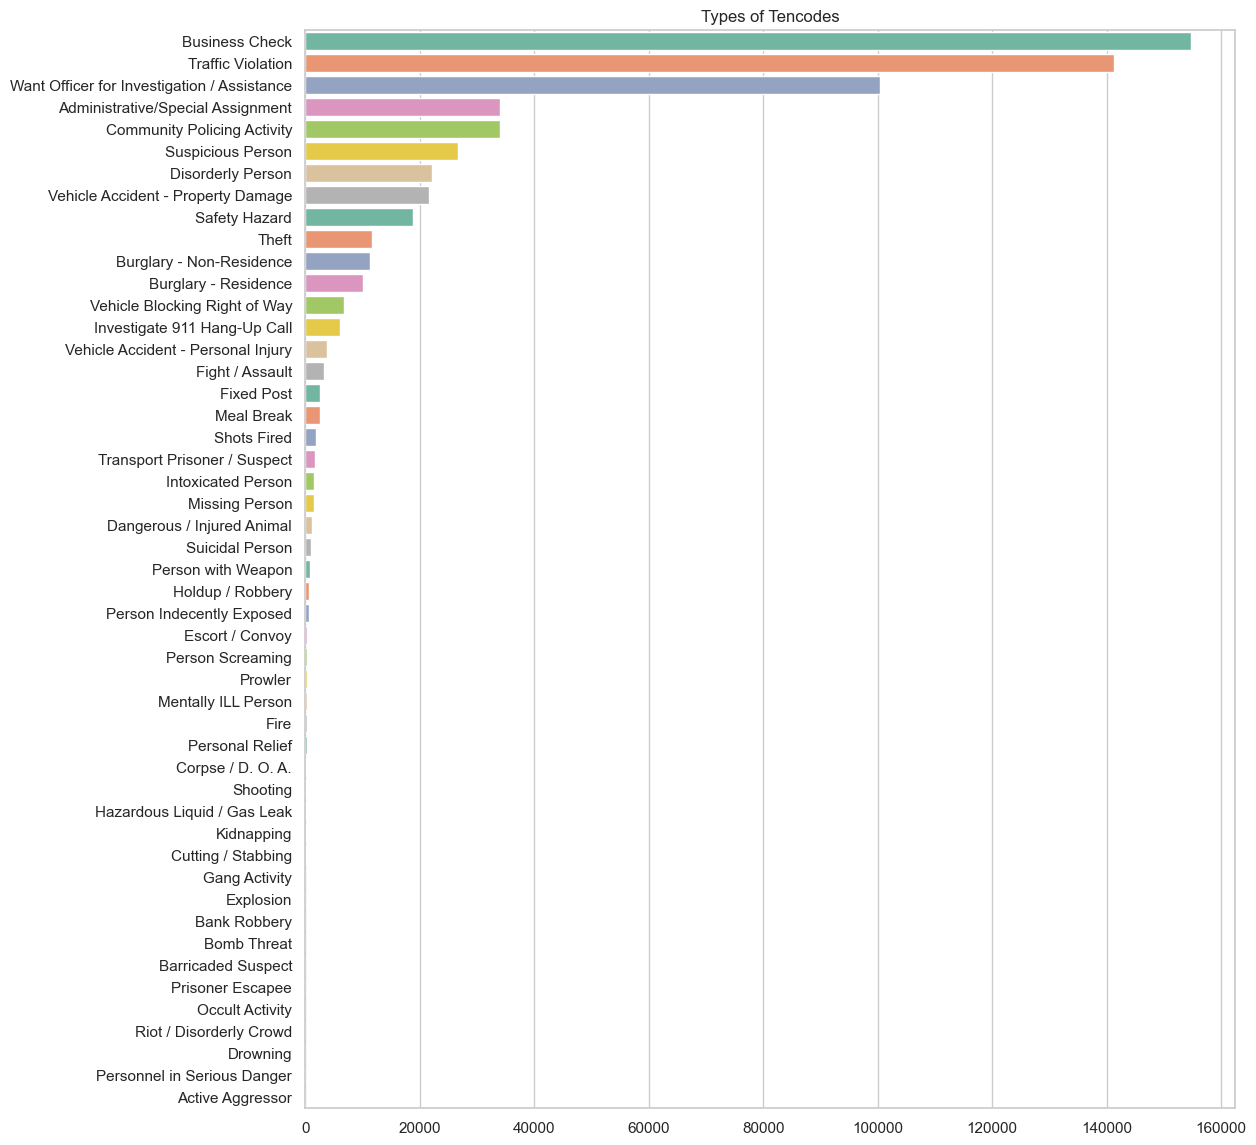

In [26]:
plt.figure(figsize = (12, 14))                               # Increase the plot size to 12 x 6
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'tencode_count', 
            y = 'tencode', 
            data = tencode_counts, 
            palette = 'Set2')
plt.xlabel('')                                              # Remove the x-axis label
plt.ylabel('')                                              # Remove the y-axis label
plt.title('Types of Tencodes');

#### 9. Find the counts of calls by zipcode and plot them.
Zipcodes look like numeric data, but should be treated as categorical.  Convert the zipcode colum to a string before plotting to avoid having big gaps where there are numbers but no zip codes.
Give the plot a meaningful title.

In [32]:
police_calls['zipcode'] = police_calls['zipcode'].astype(str)
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624841 entries, 0 to 718020
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   call_time         624841 non-null  object 
 1   shift             598272 non-null  object 
 2   tencode           624841 non-null  int64  
 3   tencode_desc      624841 non-null  object 
 4   disposition       624841 non-null  int64  
 5   disposition_desc  624841 non-null  object 
 6   unit dispatched   623556 non-null  object 
 7   sector            623737 non-null  object 
 8   zone              624841 non-null  object 
 9   lat               624841 non-null  float64
 10  long              624841 non-null  float64
 11  zipcode           624841 non-null  object 
 12  po                624841 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 66.7+ MB


In [33]:
zipcode_counts = police_calls['zipcode'].value_counts().reset_index()
zipcode_counts = zipcode_counts.rename(columns = {
    'index': 'zipcode',
    'zipcode': 'zipcode_count'})
zipcode_counts

,zipcode,zipcode_count
0,37203,61962
1,37209,52248
2,37207,48750
3,37211,47528
4,37115,39879
5,37210,35232
6,37206,33776
7,37208,32796
8,37217,29177
9,37214,28751


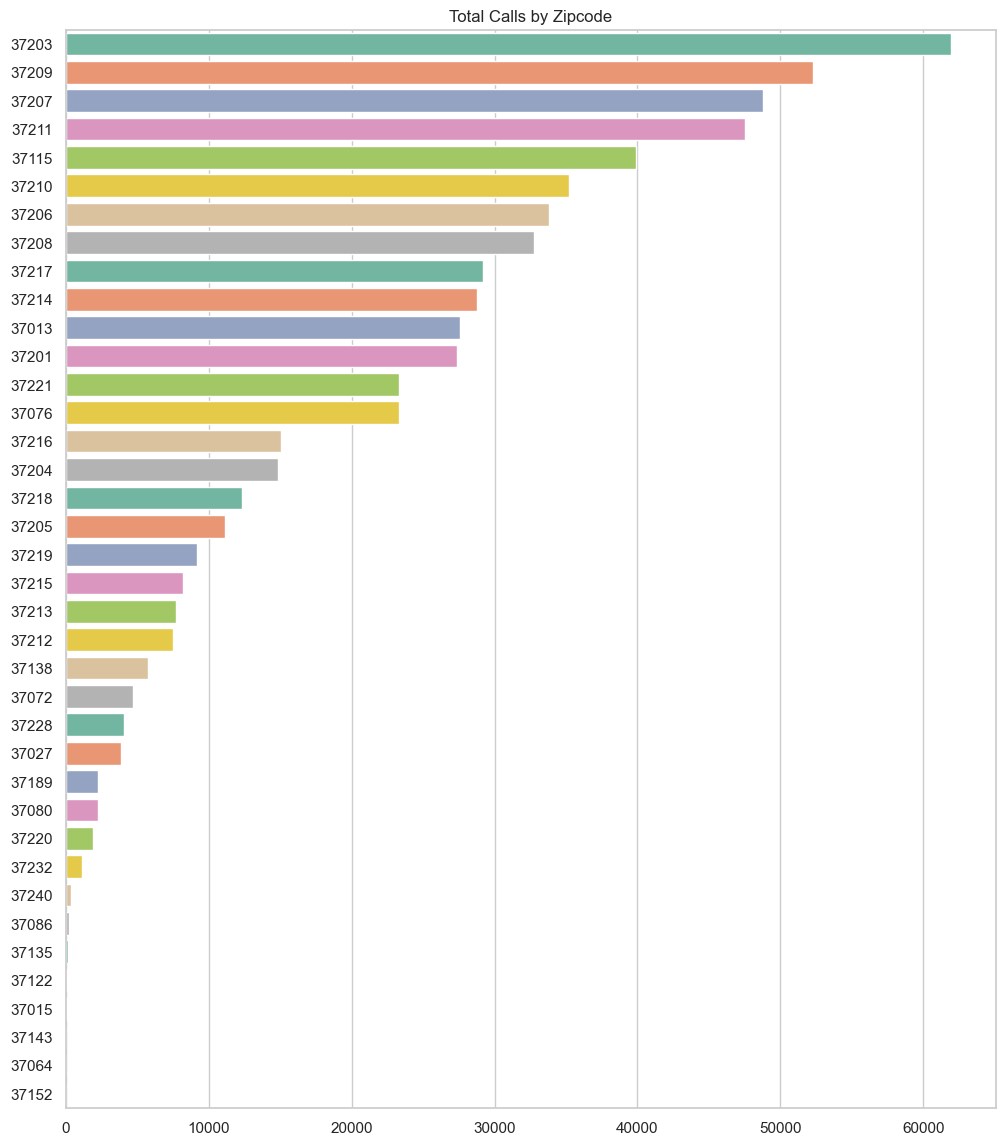

In [34]:
plt.figure(figsize = (12, 14))                               # Increase the plot size to 12 x 6
sns.set(style="whitegrid")                                  # Change the plot style
sns.barplot(x = 'zipcode_count', 
            y = 'zipcode', 
            data = zipcode_counts, 
            palette = 'Set2')
plt.xlabel('')                                              # Remove the x-axis label
plt.ylabel('')                                              # Remove the y-axis label
plt.title('Total Calls by Zipcode');